In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import plotly
import baostock
import tensorflow
import requests
import pyecharts

In [2]:
pathfile = '/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/生育数据集.txt'

In [3]:
def loadfile(pathfile,splitindex=-1):
    load = np.loadtxt(pathfile,dtype=str,delimiter=',',comments='#')
    print(load[0],load.shape)
    try:
        X,Y = load[:,:splitindex].astype(float),load[:,splitindex:]
        return X,Y
    except Exception as Error:
        return 'cant\'t split this index of column'



In [4]:
def datapreprocessing():
    srcx,srcy = loadfile(pathfile)
    x , srcyleve2 = srcx,tuple(set([i[0] for i in srcy]))
    dicty = {srcyleve2[i]:i for i in range(len(srcyleve2))}
    y = np.array([dicty[i[0]] for i in srcy])
    msm = {'x':x.shape,'y':y.shape}
    return x,y,msm

In [5]:
x , y , msm = datapreprocessing()

['-0.33' '0.69' '0' '1' '1' '0' '0.8' '0' '0.88' 'N'] (100, 10)


In [6]:
x[0],y,msm

(array([-0.33,  0.69,  0.  ,  1.  ,  1.  ,  0.  ,  0.8 ,  0.  ,  0.88]),
 array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 {'x': (100, 9), 'y': (100,)})

In [7]:



def sigmoid(x):
  '''用的是逻辑斯蒂曲线,当然根据需要也可以用线性整流函数'''
  return 1/(1+np.exp(-x))

def ReLU(a,Inactive):
  '''线性整流函数：0和a的最大值取其一，当a超过一个域值的时候就会激发，否则择不激发，输出0,效率比logistic/逻辑斯蒂曲线要高，适合特别深的神经网络'''
  return a.max() < Inactive and 0 or a.max()

def softmax(x): 
  '''柔性最大值传输函数'''
  exp = np.exp(x-x.max())
  return exp/exp.sum()

def identity(x):
  '''可以调整，获得更好的精度'''
  return x
  
def network():
  m,n = x.shape
  network = dict()
  network["W1"] = np.ones((n,3)) #第一层权重
  network["b1"] = np.ones((1,3)) #第一层偏置
  network["W2"] = np.ones((3,n)) #第二层权重
  network["b2"] = np.ones((1,n)) #第二层偏置
  network["W3"] = np.ones((n,n)) #第三层权重
  network["b3"] = np.ones((1,n)) #第三层偏置
  return network

def network2():
  m,n = x.shape
  network = dict()
  network["W1"] = np.random.randn(n,3) #第一层权重
  network["b1"] = np.random.randn(1,3) #第一层偏置
  network["W2"] = np.random.randn(3,n) #第二层权重
  network["b2"] = np.random.randn(1,n) #第二层偏置
  network["W3"] = np.random.randn(n,n) #第三层权重
  network["b3"] = np.random.randn(1,n) #第三层偏置
  return network

def network3(theta):
  m,m = x.shape




def forward(network,x):
  W1, W2 ,W3 = network["W1"],network["W2"],network["W3"]
  b1 ,b2 ,b3 = network["b1"],network["b2"],network["b3"]
  Z_func = lambda x,w,b : sigmoid(np.dot(x,w)+b)
  z1 = Z_func(x,W1,b1)
  z2 = Z_func(z1,W2,b2)
  a3 = np.dot(z2,W3)+b3
  y = softmax(identity(a3))
  return y

network = network2()
yhat = softmax(forward(network,x[0]))
yhat

array([[0.15788224, 0.10164301, 0.09871898, 0.09785061, 0.09783584,
        0.0977355 , 0.10359699, 0.14659825, 0.09813859]])

In [8]:

alpha = 0.001
maxloop = 10
thetaList = []
yhatList = []
result = []
for loop in range(maxloop):
    for i in range(m):
        yhat = softmax(forward(network,x[i]))
        theta = 1-alpha*(1/m)*np.dot(yhat-y[i],(yhat-y[i]).T)
        thetaList.append(len(theta))
        yhatList.append(yhat)
        print(theta)

            


NameError: name 'm' is not defined

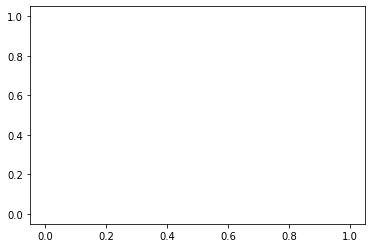

In [9]:
plt.plot(thetaList)